In [2]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
xls_file = pd.ExcelFile('top-params.xlsx')
df2 = xls_file.parse('Sheet1')
df2.columns = ['z','x','y','k']
df2

,z,x,y,k
0,119732.000000,1.4,2,2.5
1,272157.000000,1.0,2,0.5
2,323160.000000,1.0,2,0.5
3,246015.000000,1.4,2,2.5
4,212977.000000,1.4,2,0.5
5,354895.000000,1.0,2,2.5
6,338687.000000,1.0,2,2.5
7,251424.000000,1.4,2,0.5
8,199085.000000,1.4,0,0.5
9,163219.000000,1.0,0,2.5


In [4]:
# Fit the model
model = ols("z ~ x + y + k", df2).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     11.07
Date:                Thu, 31 Aug 2017   Prob (F-statistic):           0.000903
Time:                        12:53:03   Log-Likelihood:                -193.24
No. Observations:                  16   AIC:                             394.5
Df Residuals:                      12   BIC:                             397.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.671e+05   7.79e+04      7.277      0.0

/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [9]:
xls_file = pd.ExcelFile('all-params-reg.xlsx')
df3 = xls_file.parse('Sheet1')
df3.columns = ['SA','a','b','c','d','e','f','g','h','i','j']
df3

,SA,a,b,c,d,e,f,g,h,i,j
0,119732.000000,0.8,0.5,7,2,50,0.028,20,0.95,2.5,1.4
1,272157.000000,1.4,0.5,7,2,90,0.028,100,1.05,0.5,1.0
2,323160.000000,0.8,1.5,7,2,90,0.340,20,1.05,0.5,1.0
3,246015.000000,1.4,1.5,7,2,50,0.340,100,0.95,2.5,1.4
4,212977.000000,0.8,0.5,0,2,90,0.340,100,0.95,0.5,1.4
5,354895.000000,1.4,0.5,0,2,50,0.340,20,1.05,2.5,1.0
6,338687.000000,0.8,1.5,0,2,50,0.028,100,1.05,2.5,1.0
7,251424.000000,1.4,1.5,0,2,90,0.028,20,0.95,0.5,1.4
8,199085.000000,0.8,0.5,7,0,50,0.340,100,1.05,0.5,1.4
9,163219.000000,1.4,0.5,7,0,90,0.340,20,0.95,2.5,1.0


In [10]:
# Fit the model
model3 = ols("SA ~ a + b + c + d + e + f + g + h + i + j", df3).fit()

# Print the summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     SA   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     6.344
Date:                Thu, 31 Aug 2017   Prob (F-statistic):             0.0274
Time:                        12:53:31   Log-Likelihood:                -182.92
No. Observations:                  16   AIC:                             387.8
Df Residuals:                       5   BIC:                             396.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.959e+05   2.17e+05      2.740      0.0

/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [11]:
def f(row):
    if row['t-values'] < 0:
        val = 'r'
    elif row['t-values'] > 0:
        val = 'b'
    return val

In [12]:

ts= model3.tvalues.values[1:]
tvals = pd.DataFrame(ts,columns=['t-values'])

xls_file = pd.ExcelFile('all-params-reg.xlsx')
df8 = xls_file.parse('Sheet1')

tvals.insert(0, "Parameter", df8.columns[1:])
#tvals['param'] = df8.columns

tvals['flag'] = tvals.apply(f, axis=1)
tvals['t-values']  = tvals.apply((lambda x: np.absolute(x['t-values'])),axis=1)


In [15]:
tvals.sort_values('t-values',inplace=True,ascending=True)
tvals

tvals.iloc[7, tvals.columns.get_loc('Parameter')] = "Vertical contrast of min stress"
tvals.iloc[3, tvals.columns.get_loc('Parameter')] = "DFN Intensity"
tvals.iloc[9, tvals.columns.get_loc('Parameter')] = "Horizontal stress anisotropy"
tvals.iloc[1, tvals.columns.get_loc('Parameter')] = "Young's modulus"
tvals.iloc[5, tvals.columns.get_loc('Parameter')] = "Poisson's ratio"
tvals

,Parameter,t-values,flag
7,Minimum Horizontal stress,0.103790,b
0,Young's modulus,0.170162,r
6,DFN Length,0.427271,b
5,DFN Intensity,1.247133,b
2,Lamination Density,1.622176,r
1,Poisson's ratio,1.757222,b
4,DFN Azimuth,2.382076,r
8,Vertical contrast of min stress,2.386946,r
3,Fracture Offset,3.572297,b
9,Horizontal stress anisotropy,5.640050,r


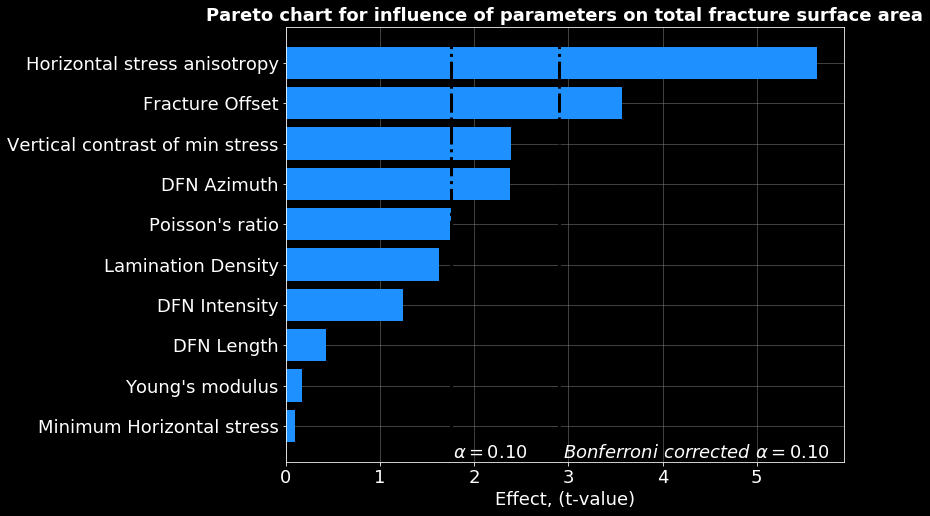

In [37]:
l = []
for item in tvals['Parameter']:
    #l.insert(0,item)
    l.append(item)
y_pos = np.arange(10)

plt.close()
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y_pos,tvals['t-values'],color='dodgerblue',alpha=1)

ax.set_yticklabels(l,weight='normal')
#ax.invert_yaxis()

plt.yticks(y_pos,l)
plt.xlabel('Effect, (t-value)',weight='normal')
plt.title('Pareto chart for influence of parameters on total fracture surface area',weight='bold')


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
ax.set_axisbelow(True)
ax.grid(color='0.5', linestyle='-', linewidth=0.5)
plt.axvline(x=1.75, linestyle='dashdot', linewidth =3, color='0' )
plt.text(1.78,-0.8, r'$ \alpha = 0.10 $', fontsize=18)

plt.axvline(x=2.9, linestyle='dashdot', linewidth =3, color='0')
plt.text(2.94,-0.8,  r'Bonferroni corrected $ \alpha = 0.10 $', style='italic' , fontsize=18)

plt.show()
#plt.tight_layout()
#fig.set_size_inches(30, 10.5)

#plt.savefig('pareto-rp2-v4.pdf',dpi=600,bbox_inches='tight')

Text(0,0,"Young's modulus")


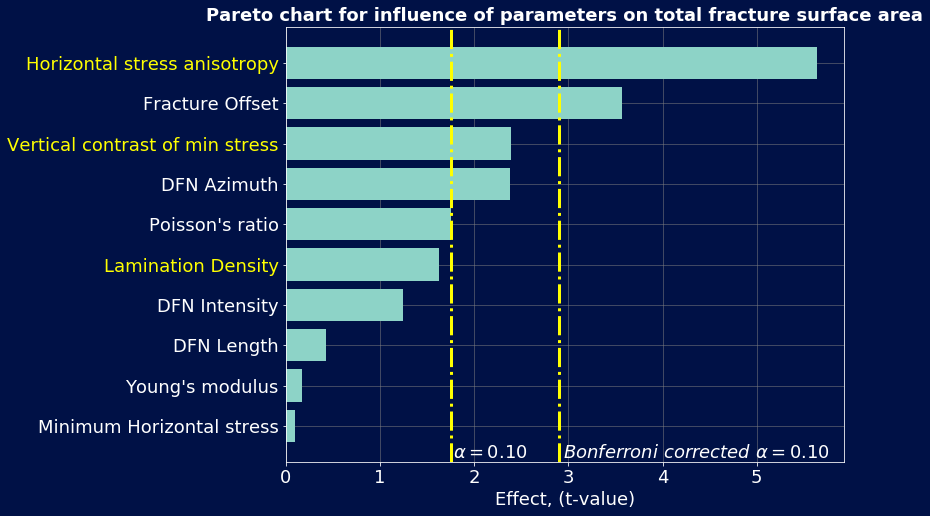

In [36]:
# as above but with dark colors

bg_color='#001146'

l = []
for item in tvals['Parameter']:
    #l.insert(0,item)
    l.append(item)
y_pos = np.arange(10)

plt.close()
fig, ax = plt.subplots(figsize=(10,8),facecolor=bg_color)
ax.barh(y_pos,tvals['t-values'],alpha=1)
ax.set_facecolor(bg_color)
ax.set_yticklabels(l,weight='normal')
#ax.invert_yaxis()

plt.yticks(y_pos,l)
plt.xlabel('Effect, (t-value)',weight='normal')
plt.title('Pareto chart for influence of parameters on total fracture surface area',weight='bold')

print(plt.yticks()[1][1])
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
ax.set_axisbelow(True)
ax.grid(color='0.5', linestyle='-', linewidth=0.5)
plt.axvline(x=1.75, linestyle='dashdot', linewidth =3, color='yellow' )
plt.text(1.78,-0.8, r'$ \alpha = 0.10 $', fontsize=18)

plt.axvline(x=2.9, linestyle='dashdot', linewidth =3, color='yellow')
plt.text(2.94,-0.8,  r'Bonferroni corrected $ \alpha = 0.10 $', style='italic' , fontsize=18)
plt.style.use('dark_background')

count=0
for ytick in ax.get_yticklabels():
    if (count==4 or count==7 or count==9):
        ytick.set_color('yellow')
    count+=1


plt.show()
#plt.tight_layout()
#fig.set_size_inches(30, 10.5)

#plt.savefig('pareto-rp2-v4.pdf',dpi=600,bbox_inches='tight')

In [87]:
tvals.ix['Parameter']

In [35]:
from textwrap import wrap
#tvals['Parameter']
labels = [ '\n'.join(wrap(l, 20)) for l in tvals['Parameter'] ]
tvals['Parameter'] = labels

In [213]:
res = model3.resid
res

0    -39000.331543
1     -6494.056152
2    -10345.556152
3     22160.719238
4    -11675.693848
5     27580.806152
6    -10741.193848
7     28515.306152
8     28515.306152
9    -10741.193848
10    27580.806152
11   -11675.693848
12    22160.719238
13   -10345.556152
14    -6494.056152
15   -39000.331543
dtype: float64

Text(0,0,"Young's modulus")


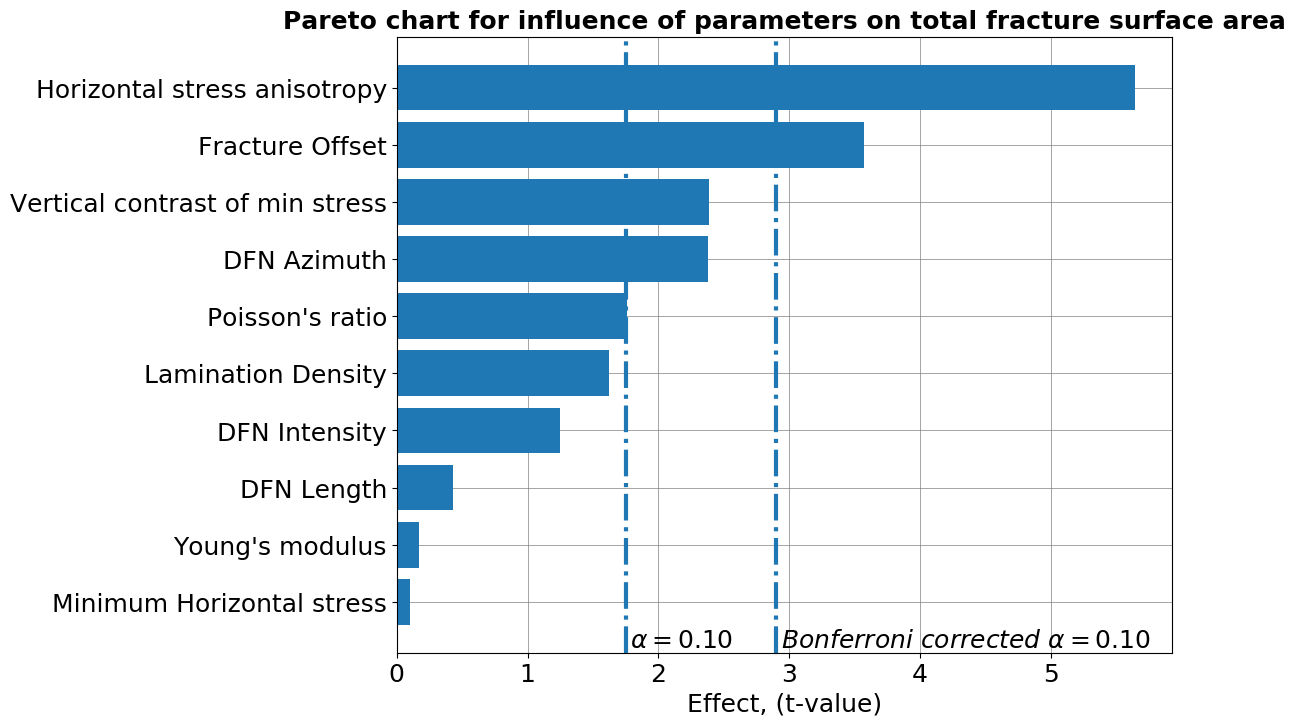

In [46]:
# as above but with dark colors

bg_color='#ffffff'

l = []
for item in tvals['Parameter']:
    #l.insert(0,item)
    l.append(item)
y_pos = np.arange(10)
#plt.style.use('default')
plt.close()
fig, ax = plt.subplots(figsize=(10,8),facecolor=bg_color)
ax.barh(y_pos,tvals['t-values'],alpha=1)
ax.set_facecolor(bg_color)
ax.set_yticklabels(l,weight='normal')
#ax.invert_yaxis()

plt.yticks(y_pos,l)
plt.xlabel('Effect, (t-value)',weight='normal')
plt.title('Pareto chart for influence of parameters on total fracture surface area',weight='bold')

print(plt.yticks()[1][1])
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
ax.set_axisbelow(True)
ax.grid(color='0.5', linestyle='-', linewidth=0.5)
plt.axvline(x=1.75, linestyle='dashdot', linewidth =3 )
plt.text(1.78,-0.8, r'$ \alpha = 0.10 $', fontsize=18)

plt.axvline(x=2.9, linestyle='dashdot', linewidth =3)
plt.text(2.94,-0.8,  r'Bonferroni corrected $ \alpha = 0.10 $', style='italic' , fontsize=18)





plt.show()
#plt.tight_layout()
#fig.set_size_inches(30, 10.5)

#plt.savefig('pareto-rp2-v4.pdf',dpi=600,bbox_inches='tight')